In [6]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:50328")
# client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:50328 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 12 Memory: 34.36 GB


In [7]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [ ]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

In [4]:
from dask import delayed
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

In [ ]:
%%time
# This actually runs our computation using a local thread pool

z.compute()

In [7]:
z

Delayed('add-c65183c4-bc27-44bd-93db-a95fec7a80ca')

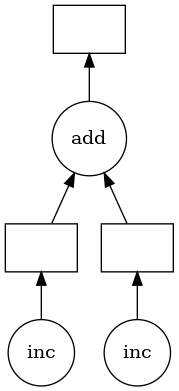

In [12]:
# Look at the task graph for `z`
z.visualize()

In [9]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [10]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

CPU times: user 420 ms, sys: 152 ms, total: 572 ms
Wall time: 8.01 s


In [11]:
%%time
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)  # After it's computed

Before computing: Delayed('sum-5a576a04-d3c6-4a1b-a97c-7915f26f3b54')
After computing : 44
CPU times: user 87.5 ms, sys: 18.5 ms, total: 106 ms
Wall time: 1.06 s


In [12]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [13]:
%%time
# Sequential code

results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)

total = sum(results)
print(total)

90
CPU times: user 554 ms, sys: 147 ms, total: 702 ms
Wall time: 10 s


In [14]:
results = []
for x in data:
    if is_even(x):  # even
        y = delayed(double)(x)
    else:          # odd
        y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)


In [15]:
%%time
total.compute()

CPU times: user 84.2 ms, sys: 11.6 ms, total: 95.8 ms
Wall time: 1.03 s


90

In [ ]:
total.visualize()

In [25]:
%run prep.py -d flights

ModuleNotFoundError: No module named 'skimage'